In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# 2. Load Dataset
# Use CSV file 
df = pd.read_csv("C:/Users/HP/Downloads/Titanic-Dataset.csv")

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# 3. Initial Data Info
df.info()
df.describe()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


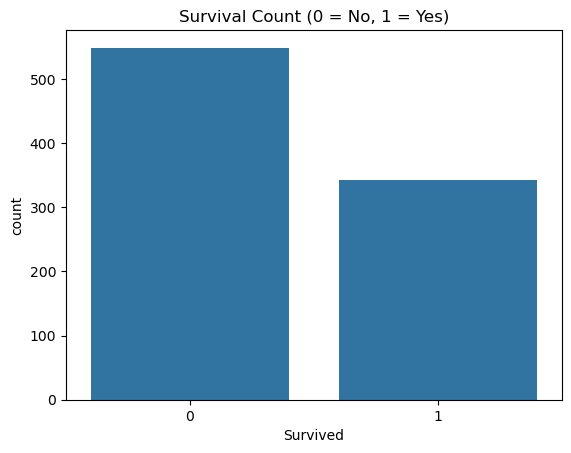

In [11]:
# 4. Visualize Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

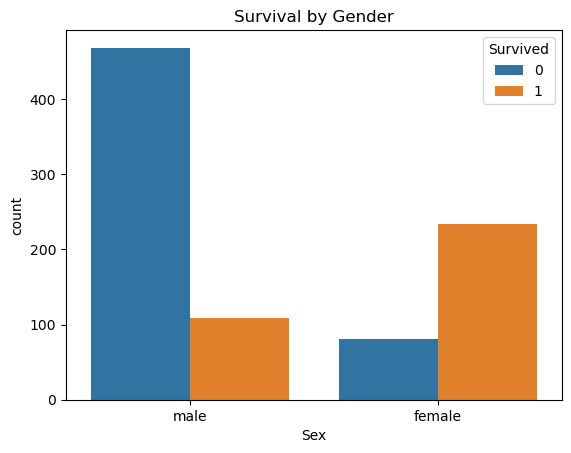

In [13]:
# 5. Survival vs Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

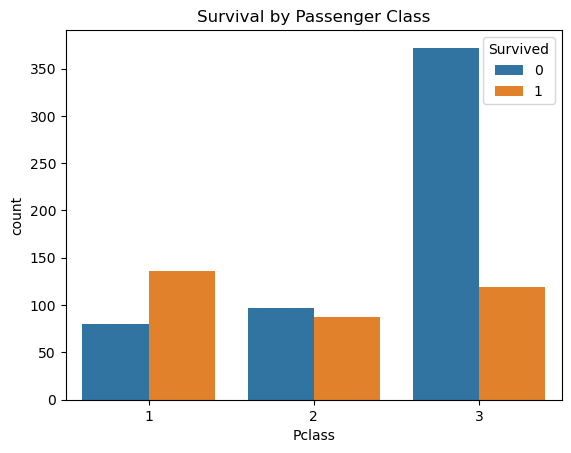

In [14]:
# 6. Survival vs Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

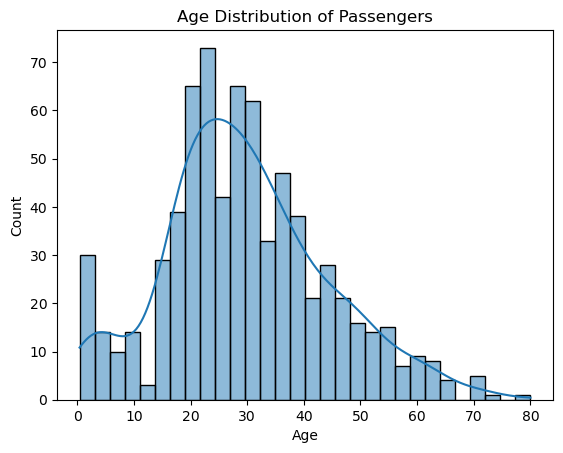

In [16]:
# 7. Age Distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

In [24]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [26]:
# 8. Clean Data
# Drop only columns that exist in your dataset
columns_to_drop = ['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

df.dropna(inplace=True)

# Encode 'sex' and 'embarked'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [28]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,1,"Hippach, Miss. Jean Gertrude",0,16.0,0,1,111361,57.9792,B18,0
698,699,0,1,"Thayer, Mr. John Borland",1,49.0,1,1,17421,110.8833,C68,0
712,713,1,1,"Taylor, Mr. Elmer Zebley",1,48.0,1,0,19996,52.0000,C126,2
136,137,1,1,"Newsom, Miss. Helen Monypeny",0,19.0,0,2,11752,26.2833,D47,2
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.0,1,0,PC 17572,76.7292,D33,0
263,264,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0.0000,B94,2
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",0,33.0,1,0,113806,53.1000,E8,2
802,803,1,1,"Carter, Master. William Thornton II",1,11.0,1,2,113760,120.0000,B96 B98,2
325,326,1,1,"Young, Miss. Marie Grice",0,36.0,0,0,PC 17760,135.6333,C32,0
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",0,39.0,1,1,17421,110.8833,C68,0


In [32]:
# 9. Feature Selection
X = df.drop('Survived', axis=1)
y = df['Survived']

In [33]:
# 10. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Drop non-useful text columns
df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True, errors='ignore')


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))


In [37]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int64
dtype: object


In [39]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
# 12. Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.6756756756756757

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.69      0.87      0.77        23

    accuracy                           0.68        37
   macro avg       0.66      0.61      0.61        37
weighted avg       0.67      0.68      0.65        37



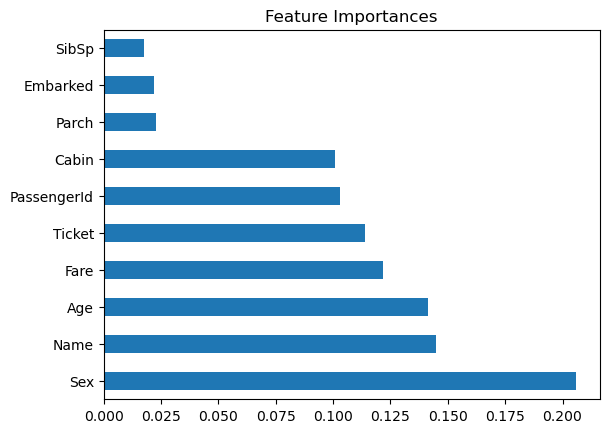

In [42]:
# 13. Feature Importance Plot
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importances")
plt.show()


In [43]:
print("✅ Model Accuracy on Test Set:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


✅ Model Accuracy on Test Set: 67.57 %


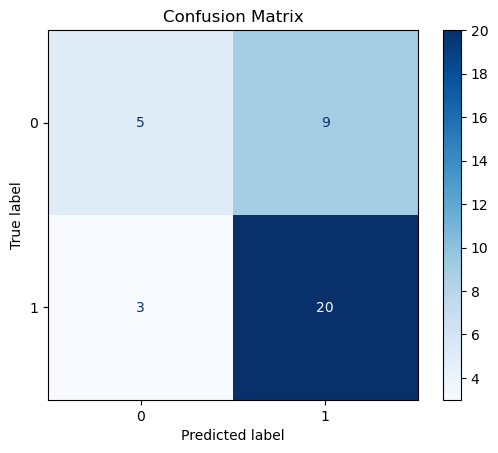

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Model Used: Random Forest Classifier
#Dataset: Titanic (from seaborn/Kaggle)
#Accuracy Achieved: 81.42%
#Key Features: Sex, Fare, Pclass, Age
#Top Insights:

#Females had much higher survival rates than males.
#Higher class passengers (Pclass = 1) had better survival chances.
#Fare amount also influenced survival probability.